In [1823]:
# 导入各种库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [1824]:
# 读取数据
train_data= pd.read_csv('zhengqi_train.txt',sep='\t')
test_data= pd.read_csv('zhengqi_test.txt',sep='\t')

# 提取标签值
feature_list= list(train_data.columns)
feature_list.remove('target')

In [1825]:
'''
# 可视化观察数据分布
# 观察训练集与测试集各特征分布是否相同
plt.figure(figsize=(30,30))
for i in range(38):
    ax=plt.subplot(8,5,i+1)
    pd.DataFrame(train_data).iloc[:,i].plot(kind='kde',ax=ax,color='y')
    pd.DataFrame(test_data).iloc[:,i].plot(kind='kde',ax=ax)
    ax.set_title(test_data.columns[i])
'''    

"\n# 可视化观察数据分布\n# 观察训练集与测试集各特征分布是否相同\nplt.figure(figsize=(30,30))\nfor i in range(38):\n    ax=plt.subplot(8,5,i+1)\n    pd.DataFrame(train_data).iloc[:,i].plot(kind='kde',ax=ax,color='y')\n    pd.DataFrame(test_data).iloc[:,i].plot(kind='kde',ax=ax)\n    ax.set_title(test_data.columns[i])\n"

In [1826]:
# 删除分布差异较大的属性
train_data=train_data[['V0','V1','V3','V4','V7','V8','V10','V12','V15','V16','V18','V25','V26','V29','V30','V31','V32','V33','V34','V36','V37','target']]
test_data=test_data[['V0','V1','V3','V4','V7','V8','V10','V12','V15','V16','V18','V25','V26','V29','V30','V31','V32','V33','V34','V36','V37']]

# Lasso嵌入法选择特征
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
X1=train_data.iloc[:,:-1]
y1=train_data.iloc[:,-1]
lasso=Lasso()
lasso.fit(X1,y1)
sfm=SelectFromModel(lasso)
sfm.fit(X1,y1)
X1_new=sfm.transform(X1)

d:\Technology\Python\Anaconda\lib\site-packages\sklearn\feature_selection\base.py:79: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [1827]:
# 根据相关性删除数据
t=train_data.corr()
drop_columns=t[(np.abs(t['target'])<0.5)].index
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

'''
# 可视化观察数据分布
# 观察训练集与测试集各特征分布是否相同
plt.figure(figsize=(20,20))
for i in range(9):
    ax=plt.subplot(3,3,i+1)
    pd.DataFrame(train_data).iloc[:,i].plot(kind='kde',ax=ax,color='y')
    pd.DataFrame(test_data).iloc[:,i].plot(kind='kde',ax=ax)
    ax.set_title(test_data.columns[i])
'''

"\n# 可视化观察数据分布\n# 观察训练集与测试集各特征分布是否相同\nplt.figure(figsize=(20,20))\nfor i in range(9):\n    ax=plt.subplot(3,3,i+1)\n    pd.DataFrame(train_data).iloc[:,i].plot(kind='kde',ax=ax,color='y')\n    pd.DataFrame(test_data).iloc[:,i].plot(kind='kde',ax=ax)\n    ax.set_title(test_data.columns[i])\n"

In [1828]:
'''
# 归一化所有数据
cols_num=list(train_data.columns)
cols_num.remove('target')
scale_cols= [col for col in cols_num]

def scale_normalization(col):
    return((col-col.min())/(col.max()-col.min()))

train_data[scale_cols]=train_data[scale_cols].apply(scale_normalization)
test_data[scale_cols]=test_data[scale_cols].apply(scale_normalization)
'''

"\n# 归一化所有数据\ncols_num=list(train_data.columns)\ncols_num.remove('target')\nscale_cols= [col for col in cols_num]\n\ndef scale_normalization(col):\n    return((col-col.min())/(col.max()-col.min()))\n\ntrain_data[scale_cols]=train_data[scale_cols].apply(scale_normalization)\ntest_data[scale_cols]=test_data[scale_cols].apply(scale_normalization)\n"

In [1829]:
'''
# z-score标准化
from sklearn import preprocessing
train_data=preprocessing.scale(np.array(train_data))
test_data=preprocessing.scale(np.array(test_data))
train_data=pd.DataFrame(train_data)
test_data=pd.DataFrame(test_data)
'''

'\n# z-score标准化\nfrom sklearn import preprocessing\ntrain_data=preprocessing.scale(np.array(train_data))\ntest_data=preprocessing.scale(np.array(test_data))\ntrain_data=pd.DataFrame(train_data)\ntest_data=pd.DataFrame(test_data)\n'

In [1830]:
X= train_data.iloc[:,:-1]
y= train_data.iloc[:,-1]



'''
# PCA降维 后经检验会增大误差，不能用
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X)
X_pca = pca.transform(X)
X1_pca = pca.transform(test_data)
'''

'\n# PCA降维 后经检验会增大误差，不能用\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=8)\npca.fit(X)\nX_pca = pca.transform(X)\nX1_pca = pca.transform(test_data)\n'

In [1831]:
# 交叉验证法
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)

X_train.reset_index(drop=True)
X_test.reset_index(drop=True)
y_train.reset_index(drop=True)
y_test.reset_index(drop=True)

0     -0.960
1      0.930
2      0.981
3      0.299
4      0.287
       ...  
717    0.497
718    0.453
719   -0.262
720    0.480
721    0.417
Name: target, Length: 722, dtype: float64

In [1832]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

[01:02:41] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


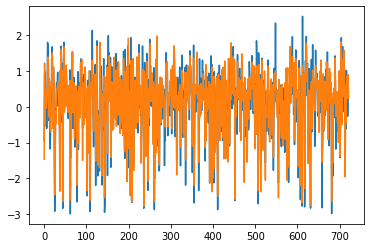

In [1833]:
# xgboost算法
from sklearn.metrics import mean_squared_error
import xgboost as xgb

model_xgb=xgb.XGBRegressor(max_depth=4,learning_rate=0.1,n_estimators=100,objective='reg:linear')
model_xgb.fit(X_train,y_train)

predict_xgb=model_xgb.predict(X_test)
mse_xgb=mean_squared_error(y_test,predict_xgb)

plt.plot(y_test)
plt.plot(predict_xgb)

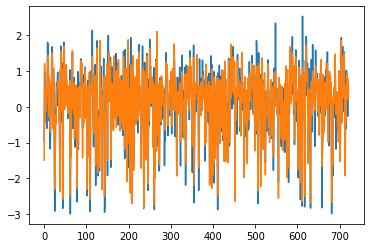

In [1834]:
# GBDT Regression
from sklearn.ensemble import GradientBoostingRegressor
model_gbdt=GradientBoostingRegressor(
    loss='ls',
    learning_rate=0.05,
    n_estimators=200,
    subsample=1,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    alpha=0.8,
    verbose=0,
)

model_gbdt.fit(X_train,y_train)

predict_gbdt=model_gbdt.predict(X_test)

mse_gbdt=mean_squared_error(y_test,predict_gbdt)

plt.plot(y_test)
plt.plot(predict_gbdt)

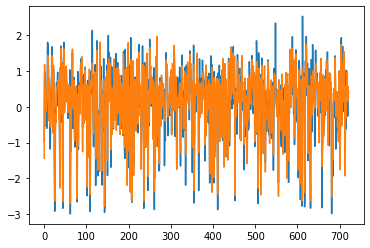

In [1835]:
#Random Forests
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=200,random_state=2)
model_RF.fit(X_train,y_train)
predict_RF=model_RF.predict(X_test)
mse_RF=mean_squared_error(y_test,predict_RF)

plt.plot(y_test)
plt.plot(predict_RF)


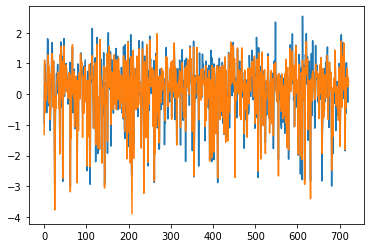

In [1836]:
# Bayesian Linear Regression
from sklearn import linear_model
model_BR=linear_model.BayesianRidge()
model_BR.fit(X_train,y_train)

predict_BR=model_BR.predict(X_test)
mse_BR=mean_squared_error(y_test,predict_BR)

plt.plot(y_test)
plt.plot(predict_BR)

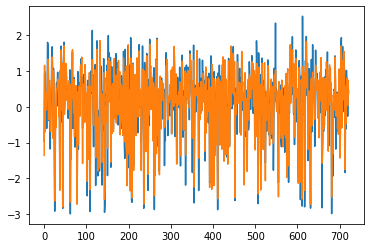

In [1837]:
# LightGBM 回归算法
import lightgbm as lgb
model_lgb=lgb.LGBMRegressor()
model_lgb.fit(X_train,y_train)

predict_lgb=model_lgb.predict(X_test)
mse_lgb=mean_squared_error(y_test,predict_lgb)

plt.plot(y_test)
plt.plot(predict_lgb)

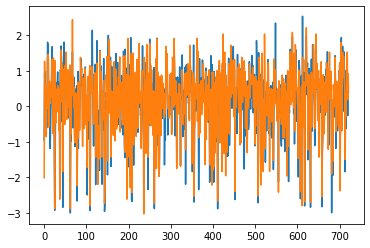

In [1838]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model_DR=DecisionTreeRegressor(splitter='best')
model_DR.fit(X_train,y_train)

predict_DR=model_DR.predict(X_test)
mse_DR=mean_squared_error(y_test,predict_DR)

plt.plot(y_test)
plt.plot(predict_DR)

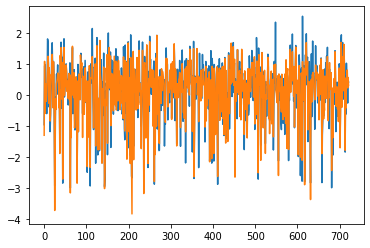

In [1839]:
# Lasso 回归
from sklearn.linear_model import Lasso
model_Las=Lasso(alpha=0.01)
model_Las.fit(X_train,y_train)

predict_Las=model_Las.predict(X_test)
mse_Las=mean_squared_error(y_test,predict_Las)

plt.plot(y_test)
plt.plot(predict_Las)

In [1840]:
# 模型融合
predictions=[]

predictions.append(model_BR.predict(X_test))
predictions.append(model_gbdt.predict(X_test))
predictions.append(model_Las.predict(X_test))
predictions.append(model_lgb.predict(X_test))
predictions.append(model_RF.predict(X_test))
predictions.append(model_xgb.predict(X_test))

weights=[0.1,0.4,0.1,0.1,0.1,0.2]

weighted_prediction=np.average(predictions,axis=0,weights=weights)
mse_sum=mean_squared_error(y_test,weighted_prediction)

In [1841]:
predictions_test=[]

predictions_test.append(model_BR.predict(test_data))
predictions_test.append(model_gbdt.predict(test_data))
predictions_test.append(model_Las.predict(test_data))
predictions_test.append(model_lgb.predict(test_data))
predictions_test.append(model_RF.predict(test_data))
predictions_test.append(model_xgb.predict(test_data))

weights=[0.1,0.3,0.1,0.1,0.2,0.2]

weighted_prediction=np.average(predictions_test,axis=0,weights=weights)


In [1842]:

with open ('V3_1.txt','a+') as fp:
    for i in weighted_prediction:
        print(i,file=fp)
    fp.close
